In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob, os, math
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data


In [2]:
path = r'C:\Users\Luciana\Documents\RSA\fake_data_analysis' 
all_files = glob.glob(os.path.join(path, "*.csv"))     
 
df_from_each_file = (pd.read_csv(f,encoding = 'unicode_escape')  for f in all_files)
logs2018 = pd.concat(df_from_each_file, ignore_index=True, sort=True)

In [3]:
logs2018.head(10)

,COR_Certified,CU,Company,Consulting_Costs,Consulting_Hours,Contact_Email,Contact_Person,Contact_Phone,Date,Description,...,Mileage_Cost,New_COR,Other_Costs,Rep_Email,Rep_Name,Rep_Phone,Total_Costs,Total_Travel_Costs,Travel_Cost,Travel_Hours
0,In Process,NaN,BCCSA,75.0,1.0,NaN,NaN,NaN,01-Apr-18,RSA quarterly report,...,NaN,NaN,NaN,uramsoondar@bccsac.a,Urvi Ramsoondar,604-636-3675,75.00,NaN,NaN,NaN
1,In Process,721027,Ecklundson,187.5,2.5,NaN,1.0,NaN,02-Apr-18,SP development,...,NaN,NaN,7.00,jose@thecgroup.ca,Jose Garcia,250.758.9436,194.50,NaN,NaN,NaN
2,No,721031 721005,Ralmax Contracting,225.0,3.0,NaN,NaN,NaN,02-Apr-18,Presentation development,...,NaN,NaN,NaN,johntomlinson@ralmax.com,John Tomlinson,250.880.1440,225.00,NaN,NaN,NaN
3,No,721027,Lakewood Dev. Ltd.,150.0,2.0,NaN,1.0,NaN,03-Apr-18,SP development,...,139.32,NaN,4.94,rbrown@leltd.ca,Rob Brown,250.478.6485,463.01,308.07,168.75,4.5
4,No,721031 721005,Ralmax Contracting,75.0,1.0,NaN,NaN,1.0,03-Apr-18,Discussion re presentation,...,NaN,NaN,NaN,vanessamara@ralmax.com,Vanessa Mara,250.880.1440,75.00,NaN,NaN,NaN
5,In Process,721027,Mastercraft Const,300.0,4.0,2.0,1.0,2.0,03-Apr-18,SP development,...,NaN,NaN,4.67,martin@mastercraftconstruction.ca,Martin Richardson,250.800.1180,304.67,NaN,NaN,NaN
6,No,721031 721005,Ralmax Contracting,300.0,4.0,NaN,1.0,NaN,03-Apr-18,COR presentation + discussion,...,NaN,NaN,NaN,johntomlinson@ralmax.com,John Tomlinson,250.880.1440,300.00,NaN,NaN,NaN
7,Yes,721049,Irwin Industries,150.0,2.0,1.0,1.0,NaN,04-Apr-18,SP development,...,143.10,NaN,4.88,bill@protechvi.com,Bill Chester,250.382.5885,466.73,311.85,168.75,4.5
8,In Process,721028,AFC Construction,150.0,2.0,1.0,1.0,NaN,09-Apr-18,COR audit preparation,...,124.20,NaN,NaN,chrisjwarburton@gmail.com,Chris Warburton,250.897.1789,386.70,236.70,112.50,3.0
9,No,NaN,START Worklink,150.0,2.0,3.0,1.0,NaN,10-Apr-18,Safety in constr. presentation,...,140.40,NaN,NaN,sphilip@worklink.bc.ca,Sharlot Philip,250.478.0578,459.15,309.15,168.75,4.5


## Columns of dataset

In [68]:
#logs2018.head(5)
logs2018.columns

Index(['COR_Certified', 'CU', 'Company', 'Consulting_Costs',
       'Consulting_Hours', 'Contact_Email', 'Contact_Person', 'Contact_Phone',
       'Date', 'Description', 'IM_Inquiry', 'Mileage', 'Mileage_Cost',
       'New_COR', 'Other_Costs', 'Rep_Email', 'Rep_Name', 'Rep_Phone',
       'Total_Costs', 'Total_Travel_Costs', 'Travel_Cost', 'Travel_Hours',
       'YYYYMM'],
      dtype='object')

## Fill NaN values with 0 and clean some data

In [5]:
logs2018.fillna(0, inplace=True)

In [6]:
logs2018.head(5)

,COR_Certified,CU,Company,Consulting_Costs,Consulting_Hours,Contact_Email,Contact_Person,Contact_Phone,Date,Description,...,Mileage_Cost,New_COR,Other_Costs,Rep_Email,Rep_Name,Rep_Phone,Total_Costs,Total_Travel_Costs,Travel_Cost,Travel_Hours
0,In Process,0,BCCSA,75.0,1.0,0.0,0.0,0.0,01-Apr-18,RSA quarterly report,...,0.00,0,0.00,uramsoondar@bccsac.a,Urvi Ramsoondar,604-636-3675,75.00,0.00,0.00,0.0
1,In Process,721027,Ecklundson,187.5,2.5,0.0,1.0,0.0,02-Apr-18,SP development,...,0.00,0,7.00,jose@thecgroup.ca,Jose Garcia,250.758.9436,194.50,0.00,0.00,0.0
2,No,721031 721005,Ralmax Contracting,225.0,3.0,0.0,0.0,0.0,02-Apr-18,Presentation development,...,0.00,0,0.00,johntomlinson@ralmax.com,John Tomlinson,250.880.1440,225.00,0.00,0.00,0.0
3,No,721027,Lakewood Dev. Ltd.,150.0,2.0,0.0,1.0,0.0,03-Apr-18,SP development,...,139.32,0,4.94,rbrown@leltd.ca,Rob Brown,250.478.6485,463.01,308.07,168.75,4.5
4,No,721031 721005,Ralmax Contracting,75.0,1.0,0.0,0.0,1.0,03-Apr-18,Discussion re presentation,...,0.00,0,0.00,vanessamara@ralmax.com,Vanessa Mara,250.880.1440,75.00,0.00,0.00,0.0


In [7]:
logs2018.loc[logs2018['Date'] == '4 Ju 18']

,COR_Certified,CU,Company,Consulting_Costs,Consulting_Hours,Contact_Email,Contact_Person,Contact_Phone,Date,Description,...,Mileage_Cost,New_COR,Other_Costs,Rep_Email,Rep_Name,Rep_Phone,Total_Costs,Total_Travel_Costs,Travel_Cost,Travel_Hours
115,No,721028,MKM Projects,150.0,2.0,1.0,1.0,0.0,4 Ju 18,SP development,...,32.94,0,0.0,jordan@mkmprojects.ca,Jordan Almond,250.618.7203,220.44,70.44,37.5,1.0


In [8]:
logs2018.loc[logs2018['Date']=='4 Ju 18', ['Date']] = '4-Jul-18' # fix 'Date'

## Create a column with format YYYYMM to group data by month

In [9]:
logs2018['YYYYMM'] = pd.to_datetime(logs2018['Date']).apply(lambda x: x.strftime('%Y%m'))

In [10]:
logs2018["Total_Costs"] = pd.to_numeric(logs2018.Total_Costs, errors='coerce')
logs2018["Consulting_Costs"] = pd.to_numeric(logs2018.Consulting_Costs, errors='coerce')
logs2018["Consulting_Hours"] = pd.to_numeric(logs2018.Consulting_Hours, errors='coerce')
logs2018["Contact_Person"] = pd.to_numeric(logs2018.Contact_Person, errors='coerce')
logs2018["Contact_Phone"] = pd.to_numeric(logs2018.Contact_Phone, errors='coerce')
logs2018["IM_Inquiry"] = pd.to_numeric(logs2018.IM_Inquiry, errors='coerce')
logs2018["Mileage"] = pd.to_numeric(logs2018.Mileage, errors='coerce')
logs2018["Mileage_Cost"] = pd.to_numeric(logs2018.Mileage_Cost, errors='coerce')
logs2018["New_COR"] = pd.to_numeric(logs2018.New_COR, errors='coerce')
logs2018["Other_Costs"] = pd.to_numeric(logs2018.Other_Costs, errors='coerce')
logs2018["Total_Costs"] = pd.to_numeric(logs2018.Total_Costs, errors='coerce')
logs2018["Total_Travel_Costs"] = pd.to_numeric(logs2018.Total_Travel_Costs, errors='coerce')
logs2018["Travel_Cost"] = pd.to_numeric(logs2018.Travel_Cost, errors='coerce')
logs2018["Travel_Hours"] = pd.to_numeric(logs2018.Travel_Hours, errors='coerce')

## Find some stats on dataset. Description of dataset shows min, max, mean, std and percentiles

In [11]:
logs2018.describe()


,Consulting_Costs,Consulting_Hours,Contact_Email,Contact_Person,Contact_Phone,IM_Inquiry,Mileage,Mileage_Cost,New_COR,Other_Costs,Total_Costs,Total_Travel_Costs,Travel_Cost,Travel_Hours
count,225.000000,225.000000,225.000000,225.000000,225.000000,223.0,225.000000,225.000000,184.0,225.00000,225.000000,225.000000,225.000000,225.000000
mean,177.166667,2.362222,1.040000,0.906667,0.177778,0.0,69.911111,37.752000,0.0,5.43640,262.341733,79.738667,41.986667,1.113333
std,77.507560,1.033434,1.323955,0.291548,0.416667,0.0,110.238950,59.529033,0.0,31.10313,173.139625,124.452469,67.525366,1.793291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,150.000000,0.000000,0.000000,0.000000
50%,150.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,194.500000,0.000000,0.000000,0.000000
75%,225.000000,3.000000,2.000000,1.000000,0.000000,0.0,105.000000,56.700000,0.0,3.39000,378.060000,188.100000,75.000000,2.000000
max,600.000000,8.000000,6.000000,1.000000,2.000000,0.0,454.000000,245.160000,0.0,373.00000,927.230000,395.160000,225.000000,6.000000


## Possible outliars - mileage_cost

In [12]:
logs2018.loc[logs2018['Mileage_Cost']>200]

,COR_Certified,CU,Company,Consulting_Costs,Consulting_Hours,Contact_Email,Contact_Person,Contact_Phone,Date,Description,...,New_COR,Other_Costs,Rep_Email,Rep_Name,Rep_Phone,Total_Costs,Total_Travel_Costs,Travel_Cost,Travel_Hours,YYYYMM
127,No,721043,Brewis Electric,150.0,2.0,1.0,1.0,0.0,18-Jul-18,COR preparation review,...,0.0,12.0,mwyatt@brewiselectric.com,Mark Wyatt,250.588.1588,557.16,395.16,150.0,4.0,201807


## Other Costs greater than $100

In [213]:
logs2018.loc[logs2018['Other_Costs']>100][['Description','Date','Company','Other_Costs','Total_Costs']]

,Description,Date,Company,Other_Costs,Total_Costs
39,"CHBC video, Burnaby",30-Aug-18,CHBABC,278.7,728.7
202,RSA mtg,25-Oct-18,BCCSA,373.0,804.7


## Total Costs per month

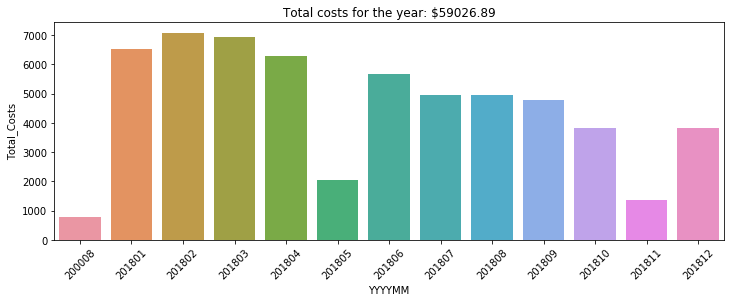

In [72]:
plt.figure(figsize=(12,4))
plt.title('Total costs for the year: $'+str(round(logs2018['Total_Costs'].sum(),2)))
g = sns.barplot(data=logs2018,y='Total_Costs',x='YYYYMM', estimator = np.sum, ci=None) # bar plot shows mean, use estimator = np.sum to show sum
for item in g.get_xticklabels():
    item.set_rotation(45)

## Mean of Total Costs per month

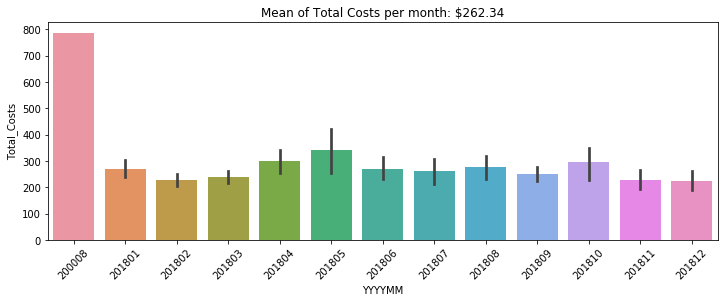

In [73]:
plt.figure(figsize=(12,4))
plt.title('Mean of Total Costs per month: $'+str(round(logs2018['Total_Costs'].mean(),2)))
g = sns.barplot(data=logs2018,y='Total_Costs',x='YYYYMM', ci=68) # bar plot shows mean, use estimator = np.sum to show sum
for item in g.get_xticklabels():
    item.set_rotation(45)

In [16]:
logs2018.loc[logs2018['YYYYMM']=='200008']['Date'] # need to fix the 'Date' for index 13 as it's causing an outlier

13    29-Aug-00
Name: Date, dtype: object

## Find correlation of data

In [17]:
logs2018.corr()

,Consulting_Costs,Consulting_Hours,Contact_Email,Contact_Person,Contact_Phone,IM_Inquiry,Mileage,Mileage_Cost,New_COR,Other_Costs,Total_Costs,Total_Travel_Costs,Travel_Cost,Travel_Hours
Consulting_Costs,1.000000,1.000000,0.092143,0.023806,0.067505,NaN,0.241142,0.241142,NaN,0.136021,0.684822,0.295949,0.332861,0.335471
Consulting_Hours,1.000000,1.000000,0.092143,0.023806,0.067505,NaN,0.241142,0.241142,NaN,0.136021,0.684822,0.295949,0.332861,0.335471
Contact_Email,0.092143,0.092143,1.000000,-0.001851,0.165090,NaN,0.148771,0.148771,NaN,0.021612,0.136086,0.126538,0.102062,0.105259
Contact_Person,0.023806,0.023806,-0.001851,1.000000,-0.009800,NaN,0.122391,0.122391,NaN,0.051532,0.091885,0.100126,0.076640,0.075824
Contact_Phone,0.067505,0.067505,0.165090,-0.009800,1.000000,NaN,0.035820,0.035820,NaN,0.052971,0.069952,0.042039,0.045901,0.047598
IM_Inquiry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,0.241142,0.241142,0.148771,0.122391,0.035820,NaN,1.000000,1.000000,NaN,0.064714,0.821655,0.976742,0.918601,0.919271
Mileage_Cost,0.241142,0.241142,0.148771,0.122391,0.035820,NaN,1.000000,1.000000,NaN,0.064714,0.821655,0.976742,0.918601,0.919271
New_COR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other_Costs,0.136021,0.136021,0.021612,0.051532,0.052971,NaN,0.064714,0.064714,NaN,1.000000,0.347198,0.148393,0.216446,0.217955


## Count of activities per Company for the year

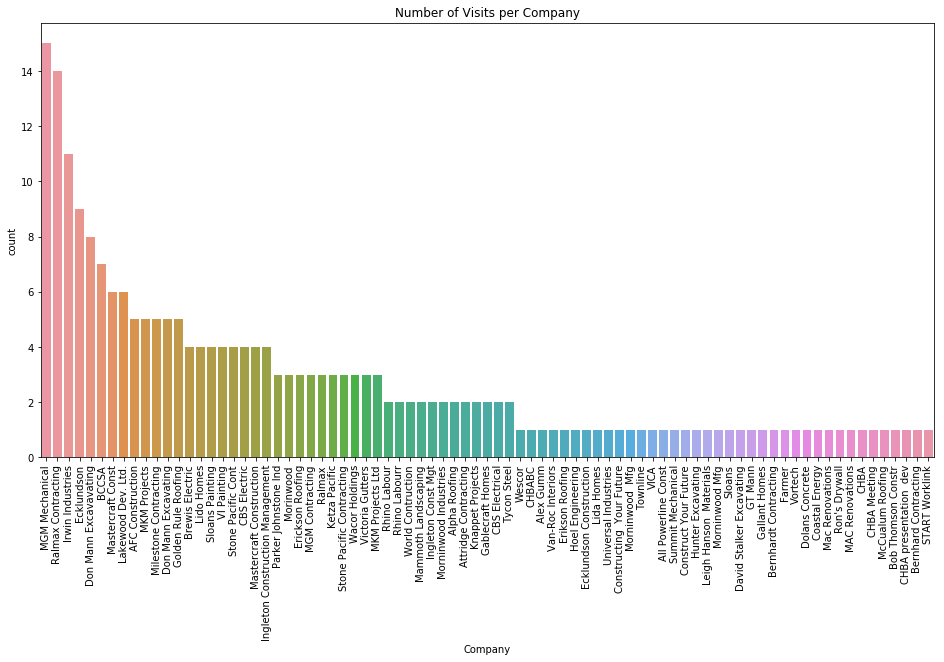

In [158]:
plt.figure(figsize=(16,8))
l = sns.countplot(logs2018['Company'], order = logs2018['Company'].value_counts().index)
for item in l.get_xticklabels():
    item.set_rotation(90)
plt.title('Number of Visits per Company')
plt.show()

## Linear regression Total Costs and Travel Costs

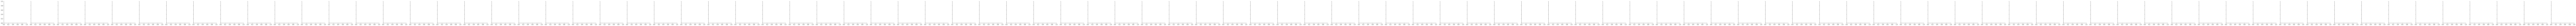

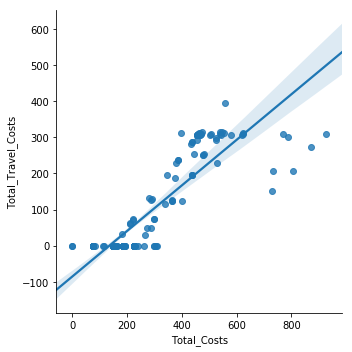

In [19]:
g = sns.FacetGrid(logs2018, col="Total_Costs")
sns.lmplot(data=logs2018,x='Total_Costs',y='Total_Travel_Costs')

## Plot of all Costs

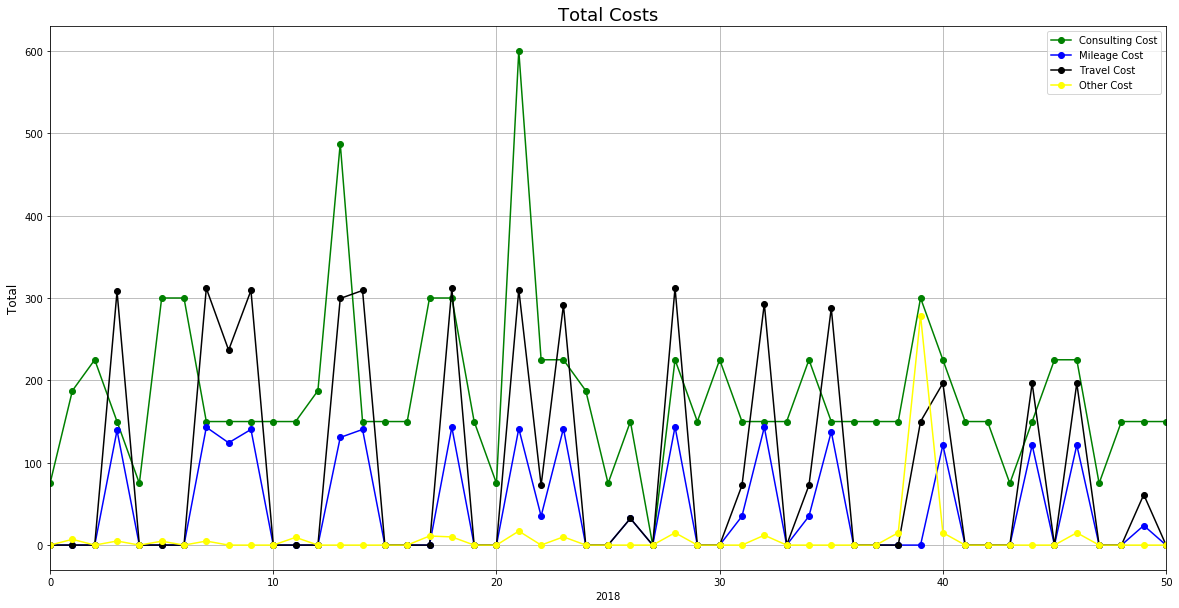

In [209]:
fig = plt.figure(figsize=(20,10))
#plt.plot(logs2018.index,logs2018['Total_Costs'],marker='o',label='Total Cost', color='red')
plt.plot(logs2018.index,logs2018['Consulting_Costs'],marker='o',label='Consulting Cost', color='green')
plt.plot(logs2018.index,logs2018['Mileage_Cost'],marker='o',label='Mileage Cost', color='blue')
plt.plot(logs2018.index,logs2018['Total_Travel_Costs'],marker='o',label='Travel Cost', color='black')
plt.plot(logs2018.index,logs2018['Other_Costs'],marker='o',label='Other Cost', color='yellow')
#plt.plot(logs2018.index,0*logs2018.index,color='black')
plt.xlabel('2018', size=10)
plt.ylabel('Total',size=12)
plt.legend()
plt.title('Total Costs',size=18)
plt.grid()
plt.xlim(0,50)
plt.show()

## Types of contact per month

In [21]:
df_merge_col = logs2018.groupby(['YYYYMM'])['Contact_Person','Contact_Phone','Contact_Email'].sum()

In [162]:
df_merge_col

,Contact_Person,Contact_Phone,Contact_Email
YYYYMM,,,
200008,1.0,1.0,1.0
201801,23.0,5.0,42.0
201802,25.0,4.0,33.0
201803,25.0,1.0,27.0
201804,18.0,5.0,17.0
201805,6.0,1.0,10.0
201806,20.0,3.0,17.0
201807,18.0,4.0,12.0
201808,18.0,8.0,21.0


In [163]:
df_merge_col.agg(['sum'])

,Contact_Person,Contact_Phone,Contact_Email
sum,204.0,40.0,234.0


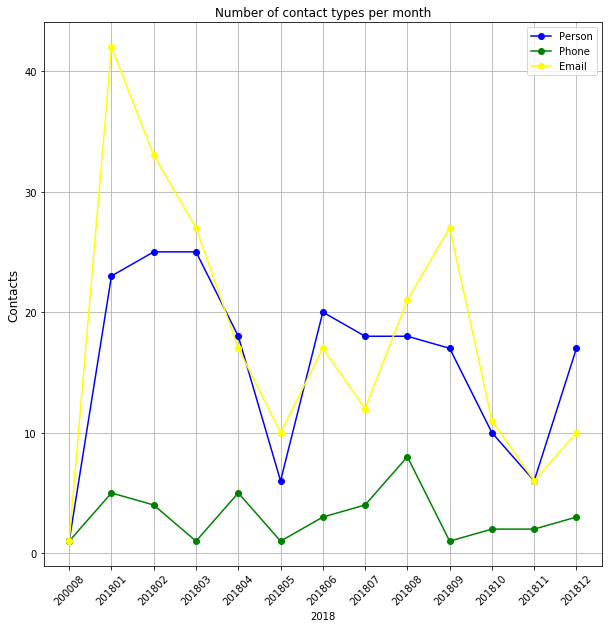

In [24]:
fig = plt.figure(figsize=(10,10))
plt.title('Number of contact types per month')
plt.plot(df_merge_col.index,df_merge_col['Contact_Person'],marker='o',label='Person', color='blue')
plt.plot(df_merge_col.index,df_merge_col['Contact_Phone'],marker='o',label='Phone', color='green')
plt.plot(df_merge_col.index,df_merge_col['Contact_Email'],marker='o',label='Email', color='yellow')
plt.xlabel('2018', size=10)
plt.ylabel('Contacts',size=12)
plt.legend()
plt.grid()
#plt.xlim(0,50)
plt.xticks(rotation=45)
plt.show()

## Companies with more than 2 visits per month

In [25]:
df5 = pd.DataFrame(logs2018.groupby(['YYYYMM','Company'])['Company'].count())
df5 = df5.rename(columns={"Company": "Count"}).reset_index()

In [26]:
df5

,YYYYMM,Company,Count
0,200008,Mastercraft Const,1
1,201801,AFC Construction,1
2,201801,CHBA,1
3,201801,David Stalker Excavating,1
4,201801,Erickson Roofing,1
5,201801,Gallant Homes,1
6,201801,Irwin Industries,2
7,201801,MGM Mechanical,1
8,201801,Mastercraft Construction,3
9,201801,Morninwood Mfg,1


In [27]:
dfC = df5.where(df5['Count']>2).dropna().reset_index()
len(dfC)

24

In [28]:
dfC

,index,YYYYMM,Company,Count
0,8,201801,Mastercraft Construction,3.0
1,14,201801,Sloans Painting,3.0
2,25,201802,Ecklundson,5.0
3,31,201802,MGM Mechanical,3.0
4,33,201802,Morinwood,3.0
5,41,201803,Ketza Pacific,3.0
6,42,201803,Lakewood Dev. Ltd.,3.0
7,46,201803,Milestone Contracting,3.0
8,49,201803,Ralmax Contracting,3.0
9,50,201803,VI Painting,3.0


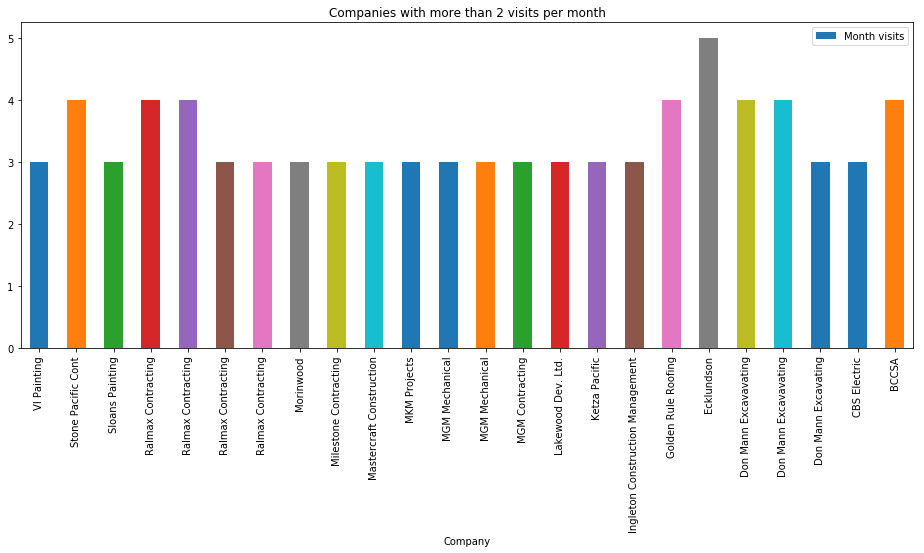

In [157]:
dfC.sort_values('Company', ascending=False, inplace=True)
ax = dfC.plot(x='Company',y='Count', figsize=(16,6),kind='bar',label='Month visits', title='Companies with more than 2 visits per month')



### Analysis of "Ralmax Contracting"

In [30]:
logs2018.where(logs2018['Company']=='Ralmax Contracting')[['Description','Date']].dropna()

,Description,Date
2,Presentation development,02-Apr-18
4,Discussion re presentation,03-Apr-18
6,COR presentation + discussion,03-Apr-18
40,SP development,04-Dec-18
45,JOHSC presentation preparation,06-Dec-18
46,JOHSC presentation preparation,12-Dec-18
52,SP development,18-Dec-18
165,Training req's discussion,07-Mar-18
168,Training matrix review,13-Mar-18
174,Discussion re on-COR costs,20-Mar-18


## Costs breakdown for 2018

In [31]:
df = pd.DataFrame(logs2018, columns = ['Consulting_Costs', 'Mileage_Cost', 'Other_Costs', 'Total_Travel_Costs']).sum()

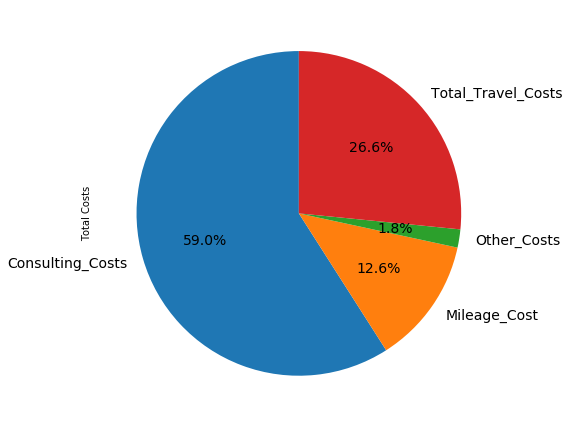

In [154]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'Total_Costs', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, label='Total Costs',legend = False, fontsize=14)
plt.show()

In [81]:
df6 = logs2018.groupby(['YYYYMM'])['IM_Inquiry','New_COR','COR_Certified'].count()

In [83]:
df6

,IM_Inquiry,New_COR,COR_Certified
YYYYMM,,,
200008,1,1,1
201801,24,20,24
201802,30,28,31
201803,29,22,29
201804,21,19,21
201805,6,6,6
201806,21,19,21
201807,18,16,19
201808,18,10,18


## Number of visits per IM_Inquiry and New_COR

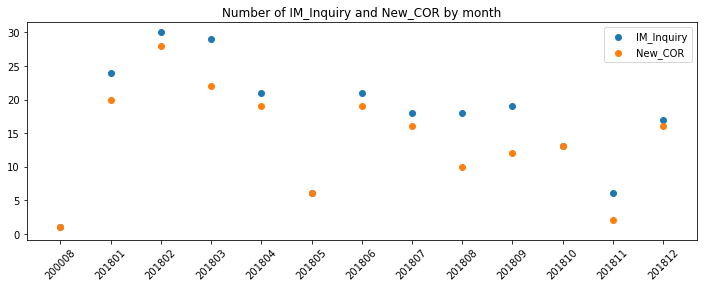

In [164]:
plt.figure(figsize=(12,4))
plt.title('Number of IM_Inquiry and New_COR by month')
plt.xticks(rotation=45)
plt.scatter(df6.index, df6['IM_Inquiry'])
plt.scatter(df6.index, df6['New_COR'])
plt.legend()
#plt.scatter(df6.index, df6['COR_Certified'])

## Cost per month compared to number of visits (activities)

In [147]:
df7 = pd.DataFrame(logs2018.groupby(['YYYYMM'])['Total_Costs'].sum())

In [148]:
df7['Num_Visits'] = logs2018['YYYYMM'].value_counts()
df7.reset_index(inplace=True)

In [149]:
df7

,YYYYMM,Total_Costs,Num_Visits
0,200008,786.93,1
1,201801,6505.78,24
2,201802,7076.44,31
3,201803,6917.11,29
4,201804,6290.85,21
5,201805,2049.27,6
6,201806,5680.35,21
7,201807,4964.16,19
8,201808,4953.07,18
9,201809,4768.75,19


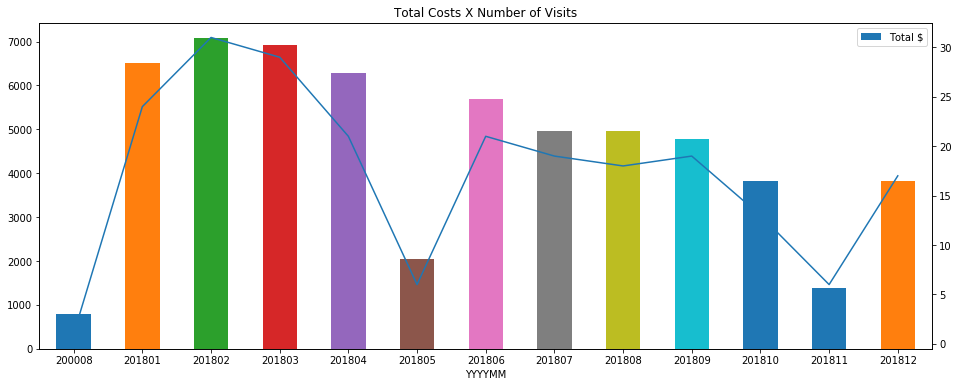

In [150]:
df7.plot(x='YYYYMM',y='Total_Costs', figsize=(16,6),kind='bar',label='Total $', title='Total Costs X Number of Visits')
df7['Num_Visits'].plot(secondary_y=True)


## Company name must be normalized

In [194]:
df8 = pd.DataFrame(logs2018.Company.unique())

In [201]:
df8.columns = ['Company']

In [204]:
df8.sort_values(by=['Company'])

,Company
6,AFC Construction
40,Alex Gumm
39,All Powerline Const
21,Alpha Roofing
8,Attridge Contracting
0,BCCSA
44,Bernhard Contracting
41,Bernhardt Contracting
26,Bob Thomson Constr
10,Brewis Electric
